In [9]:
import gymnasium as gym
from gymnasium.wrappers import TimeLimit
import mani_skill.envs
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env
from mani_skill.utils import gym_utils
from mani_skill.utils.wrappers.record import RecordEpisode
from mani_skill.vector.wrappers.sb3 import ManiSkillSB3VectorEnv
import torch
import numpy as np
import matplotlib.pyplot as plt

SEED = 17
NUM_ENVS = 8
total_timesteps = 100000


In [3]:
def run_ppo(env, total_timesteps, policy = "MlpPolicy", learning_rate = 3e-4, model_name = ""):
    ppo_model = PPO(policy = policy, env = env, learning_rate = learning_rate, n_steps = 2048, batch_size = 64, n_epochs = 10, gamma = 0.99, gae_lambda = .95,
    clip_range = .2, verbose = 1, seed = SEED)
    ppo_model.learn(total_timesteps = total_timesteps, progress_bar = True)
    ppo_model.save(model_name)

In [4]:
env = gym.make("CartPole-v1", render_mode = "rgb_array")
states, _ = env.reset(seed = SEED, options = {"low": -0.1, "high": 0.1})
check_env(env, warn = True)

In [5]:
run_ppo(env, total_timesteps, learning_rate = .01, model_name = "ppo_.01")
run_ppo(env, total_timesteps, learning_rate = 1e-3, model_name = "ppo_1e-3")
run_ppo(env, total_timesteps, learning_rate = 1e-6, model_name = "ppo_1e-6")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | 23.2     |
| time/              |          |
|    fps             | 536      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 31.3        |
|    ep_rew_mean          | 31.3        |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.0167068   |
|    clip_fraction        | 0.309       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.678      |
|    explained_variance   | 0.001110971 |
|    learning_rate        | 0.01        |
|    loss                 | 3.29        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0278     |
|    value_loss           | 10.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 45.5        |
|    ep_rew_mean          | 45.5        |
| time/                   |             |
|    fps                  | 527         |
|    iterations           | 3           |
|    time_elapsed         | 11          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.018115848 |
|    clip_fraction        | 0.281       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.633      |
|    explained_variance   | 0.35051215  |
|    learning_rate        | 0.01        |
|    loss                 | 11.4        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0348     |
|    value_loss           | 26.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 63          |
|    ep_rew_mean          | 63          |
| time/                   |             |
|    fps                  | 547         |
|    iterations           | 4           |
|    time_elapsed         | 14          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.019164925 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.584      |
|    explained_variance   | 0.36435997  |
|    learning_rate        | 0.01        |
|    loss                 | 18.2        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0265     |
|    value_loss           | 43.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 80          |
|    ep_rew_mean          | 80          |
| time/                   |             |
|    fps                  | 560         |
|    iterations           | 5           |
|    time_elapsed         | 18          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.011287944 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.545      |
|    explained_variance   | 0.5797188   |
|    learning_rate        | 0.01        |
|    loss                 | 14.6        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0125     |
|    value_loss           | 25.7        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 99.8      |
|    ep_rew_mean          | 99.8      |
| time/                   |           |
|    fps                  | 570       |
|    iterations           | 6         |
|    time_elapsed         | 21        |
|    total_timesteps      | 12288     |
| train/                  |           |
|    approx_kl            | 0.4096927 |
|    clip_fraction        | 0.334     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.434    |
|    explained_variance   | 0.676079  |
|    learning_rate        | 0.01      |
|    loss                 | 1.14      |
|    n_updates            | 50        |
|    policy_gradient_loss | 0.0156    |
|    value_loss           | 5.27      |
---------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 114         |
|    ep_rew_mean          | 114         |
| time/                   |             |
|    fps                  | 577         |
|    iterations           | 7           |
|    time_elapsed         | 24          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.034685217 |
|    clip_fraction        | 0.315       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.285      |
|    explained_variance   | 0.7110448   |
|    learning_rate        | 0.01        |
|    loss                 | 0.479       |
|    n_updates            | 60          |
|    policy_gradient_loss | 0.0467      |
|    value_loss           | 4.94        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 131        |
|    ep_rew_mean          | 131        |
| time/                   |            |
|    fps                  | 583        |
|    iterations           | 8          |
|    time_elapsed         | 28         |
|    total_timesteps      | 16384      |
| train/                  |            |
|    approx_kl            | 0.05778197 |
|    clip_fraction        | 0.248      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.256     |
|    explained_variance   | 0.9297934  |
|    learning_rate        | 0.01       |
|    loss                 | 0.187      |
|    n_updates            | 70         |
|    policy_gradient_loss | 0.041      |
|    value_loss           | 1.02       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 147        |
|    ep_rew_mean          | 147        |
| time/                   |            |
|    fps                  | 587        |
|    iterations           | 9          |
|    time_elapsed         | 31         |
|    total_timesteps      | 18432      |
| train/                  |            |
|    approx_kl            | 0.26085907 |
|    clip_fraction        | 0.219      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.165     |
|    explained_variance   | 0.96823615 |
|    learning_rate        | 0.01       |
|    loss                 | 0.161      |
|    n_updates            | 80         |
|    policy_gradient_loss | 0.0474     |
|    value_loss           | 0.803      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 164        |
|    ep_rew_mean          | 164        |
| time/                   |            |
|    fps                  | 590        |
|    iterations           | 10         |
|    time_elapsed         | 34         |
|    total_timesteps      | 20480      |
| train/                  |            |
|    approx_kl            | 0.13197927 |
|    clip_fraction        | 0.147      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.113     |
|    explained_variance   | 0.98169345 |
|    learning_rate        | 0.01       |
|    loss                 | 0.113      |
|    n_updates            | 90         |
|    policy_gradient_loss | 0.0561     |
|    value_loss           | 0.563      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 181        |
|    ep_rew_mean          | 181        |
| time/                   |            |
|    fps                  | 593        |
|    iterations           | 11         |
|    time_elapsed         | 37         |
|    total_timesteps      | 22528      |
| train/                  |            |
|    approx_kl            | 0.14549762 |
|    clip_fraction        | 0.149      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0498    |
|    explained_variance   | 0.9864955  |
|    learning_rate        | 0.01       |
|    loss                 | 0.158      |
|    n_updates            | 100        |
|    policy_gradient_loss | 0.0494     |
|    value_loss           | 0.466      |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 189       |
|    ep_rew_mean          | 189       |
| time/                   |           |
|    fps                  | 596       |
|    iterations           | 12        |
|    time_elapsed         | 41        |
|    total_timesteps      | 24576     |
| train/                  |           |
|    approx_kl            | 0.6047367 |
|    clip_fraction        | 0.22      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0761   |
|    explained_variance   | 0.9924941 |
|    learning_rate        | 0.01      |
|    loss                 | 0.19      |
|    n_updates            | 110       |
|    policy_gradient_loss | -0.00074  |
|    value_loss           | 0.472     |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 193        |
|    ep_rew_mean          | 193        |
| time/                   |            |
|    fps                  | 598        |
|    iterations           | 13         |
|    time_elapsed         | 44         |
|    total_timesteps      | 26624      |
| train/                  |            |
|    approx_kl            | 0.02793847 |
|    clip_fraction        | 0.0968     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.139     |
|    explained_variance   | 0.7882121  |
|    learning_rate        | 0.01       |
|    loss                 | 2.43       |
|    n_updates            | 120        |
|    policy_gradient_loss | 0.0226     |
|    value_loss           | 7.22       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 175         |
|    ep_rew_mean          | 175         |
| time/                   |             |
|    fps                  | 600         |
|    iterations           | 14          |
|    time_elapsed         | 47          |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.026302632 |
|    clip_fraction        | 0.0533      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0623     |
|    explained_variance   | 0.97528875  |
|    learning_rate        | 0.01        |
|    loss                 | 0.636       |
|    n_updates            | 130         |
|    policy_gradient_loss | 0.00215     |
|    value_loss           | 2.13        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 183         |
|    ep_rew_mean          | 183         |
| time/                   |             |
|    fps                  | 601         |
|    iterations           | 15          |
|    time_elapsed         | 51          |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.011315618 |
|    clip_fraction        | 0.0703      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.075      |
|    explained_variance   | 0.98560745  |
|    learning_rate        | 0.01        |
|    loss                 | 0.814       |
|    n_updates            | 140         |
|    policy_gradient_loss | 0.0104      |
|    value_loss           | 2.22        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 190         |
|    ep_rew_mean          | 190         |
| time/                   |             |
|    fps                  | 603         |
|    iterations           | 16          |
|    time_elapsed         | 54          |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.022901967 |
|    clip_fraction        | 0.0793      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.107      |
|    explained_variance   | 0.98625636  |
|    learning_rate        | 0.01        |
|    loss                 | 1.44        |
|    n_updates            | 150         |
|    policy_gradient_loss | 0.00268     |
|    value_loss           | 3.3         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 199          |
|    ep_rew_mean          | 199          |
| time/                   |              |
|    fps                  | 604          |
|    iterations           | 17           |
|    time_elapsed         | 57           |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 0.0132249165 |
|    clip_fraction        | 0.0895       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0982      |
|    explained_variance   | 0.987403     |
|    learning_rate        | 0.01         |
|    loss                 | 0.568        |
|    n_updates            | 160          |
|    policy_gradient_loss | 0.00239      |
|    value_loss           | 2.42         |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 209        |
|    ep_rew_mean          | 209        |
| time/                   |            |
|    fps                  | 605        |
|    iterations           | 18         |
|    time_elapsed         | 60         |
|    total_timesteps      | 36864      |
| train/                  |            |
|    approx_kl            | 0.13805088 |
|    clip_fraction        | 0.136      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.121     |
|    explained_variance   | 0.99322337 |
|    learning_rate        | 0.01       |
|    loss                 | 0.309      |
|    n_updates            | 170        |
|    policy_gradient_loss | 0.00956    |
|    value_loss           | 1.38       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 220        |
|    ep_rew_mean          | 220        |
| time/                   |            |
|    fps                  | 606        |
|    iterations           | 19         |
|    time_elapsed         | 64         |
|    total_timesteps      | 38912      |
| train/                  |            |
|    approx_kl            | 0.17491548 |
|    clip_fraction        | 0.2        |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0939    |
|    explained_variance   | 0.9923039  |
|    learning_rate        | 0.01       |
|    loss                 | 0.236      |
|    n_updates            | 180        |
|    policy_gradient_loss | 0.0234     |
|    value_loss           | 0.613      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 233        |
|    ep_rew_mean          | 233        |
| time/                   |            |
|    fps                  | 607        |
|    iterations           | 20         |
|    time_elapsed         | 67         |
|    total_timesteps      | 40960      |
| train/                  |            |
|    approx_kl            | 0.09166546 |
|    clip_fraction        | 0.145      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.147     |
|    explained_variance   | 0.99169177 |
|    learning_rate        | 0.01       |
|    loss                 | 0.125      |
|    n_updates            | 190        |
|    policy_gradient_loss | 0.0149     |
|    value_loss           | 0.733      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 241        |
|    ep_rew_mean          | 241        |
| time/                   |            |
|    fps                  | 608        |
|    iterations           | 21         |
|    time_elapsed         | 70         |
|    total_timesteps      | 43008      |
| train/                  |            |
|    approx_kl            | 0.04997057 |
|    clip_fraction        | 0.17       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.119     |
|    explained_variance   | 0.95113677 |
|    learning_rate        | 0.01       |
|    loss                 | 0.234      |
|    n_updates            | 200        |
|    policy_gradient_loss | 0.0122     |
|    value_loss           | 1.31       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 17.4       |
|    ep_rew_mean          | 17.4       |
| time/                   |            |
|    fps                  | 609        |
|    iterations           | 22         |
|    time_elapsed         | 73         |
|    total_timesteps      | 45056      |
| train/                  |            |
|    approx_kl            | 0.4078204  |
|    clip_fraction        | 0.247      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.196     |
|    explained_variance   | 0.97899896 |
|    learning_rate        | 0.01       |
|    loss                 | 0.379      |
|    n_updates            | 210        |
|    policy_gradient_loss | 0.028      |
|    value_loss           | 1.53       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 21.5       |
|    ep_rew_mean          | 21.5       |
| time/                   |            |
|    fps                  | 610        |
|    iterations           | 23         |
|    time_elapsed         | 77         |
|    total_timesteps      | 47104      |
| train/                  |            |
|    approx_kl            | 0.03415412 |
|    clip_fraction        | 0.484      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.619     |
|    explained_variance   | 0.38645482 |
|    learning_rate        | 0.01       |
|    loss                 | 41.8       |
|    n_updates            | 220        |
|    policy_gradient_loss | 0.000292   |
|    value_loss           | 235        |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 24.9       |
|    ep_rew_mean          | 24.9       |
| time/                   |            |
|    fps                  | 610        |
|    iterations           | 24         |
|    time_elapsed         | 80         |
|    total_timesteps      | 49152      |
| train/                  |            |
|    approx_kl            | 0.07005745 |
|    clip_fraction        | 0.479      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.595     |
|    explained_variance   | 0.46810776 |
|    learning_rate        | 0.01       |
|    loss                 | 46.1       |
|    n_updates            | 230        |
|    policy_gradient_loss | -0.0152    |
|    value_loss           | 94.7       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 36.3        |
|    ep_rew_mean          | 36.3        |
| time/                   |             |
|    fps                  | 611         |
|    iterations           | 25          |
|    time_elapsed         | 83          |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.041104797 |
|    clip_fraction        | 0.587       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.595      |
|    explained_variance   | 0.512351    |
|    learning_rate        | 0.01        |
|    loss                 | 26.6        |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0349     |
|    value_loss           | 63.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 50.8        |
|    ep_rew_mean          | 50.8        |
| time/                   |             |
|    fps                  | 612         |
|    iterations           | 26          |
|    time_elapsed         | 86          |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.024404004 |
|    clip_fraction        | 0.458       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.552      |
|    explained_variance   | 0.33054847  |
|    learning_rate        | 0.01        |
|    loss                 | 35          |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 71.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 67.4        |
|    ep_rew_mean          | 67.4        |
| time/                   |             |
|    fps                  | 612         |
|    iterations           | 27          |
|    time_elapsed         | 90          |
|    total_timesteps      | 55296       |
| train/                  |             |
|    approx_kl            | 0.030978635 |
|    clip_fraction        | 0.382       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.507      |
|    explained_variance   | 0.37807012  |
|    learning_rate        | 0.01        |
|    loss                 | 24.9        |
|    n_updates            | 260         |
|    policy_gradient_loss | -0.0123     |
|    value_loss           | 55.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 84.3        |
|    ep_rew_mean          | 84.3        |
| time/                   |             |
|    fps                  | 613         |
|    iterations           | 28          |
|    time_elapsed         | 93          |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.023147402 |
|    clip_fraction        | 0.259       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.503      |
|    explained_variance   | 0.4720704   |
|    learning_rate        | 0.01        |
|    loss                 | 40.4        |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.0182     |
|    value_loss           | 66.3        |
-----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 103       |
|    ep_rew_mean          | 103       |
| time/                   |           |
|    fps                  | 613       |
|    iterations           | 29        |
|    time_elapsed         | 96        |
|    total_timesteps      | 59392     |
| train/                  |           |
|    approx_kl            | 0.6993016 |
|    clip_fraction        | 0.479     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.185    |
|    explained_variance   | 0.9179131 |
|    learning_rate        | 0.01      |
|    loss                 | 0.47      |
|    n_updates            | 280       |
|    policy_gradient_loss | 0.0669    |
|    value_loss           | 6.14      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 123        |
|    ep_rew_mean          | 123        |
| time/                   |            |
|    fps                  | 614        |
|    iterations           | 30         |
|    time_elapsed         | 100        |
|    total_timesteps      | 61440      |
| train/                  |            |
|    approx_kl            | 1.1057689  |
|    clip_fraction        | 0.509      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.161     |
|    explained_variance   | 0.59352136 |
|    learning_rate        | 0.01       |
|    loss                 | 1.2        |
|    n_updates            | 290        |
|    policy_gradient_loss | 0.0617     |
|    value_loss           | 3.52       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 142        |
|    ep_rew_mean          | 142        |
| time/                   |            |
|    fps                  | 614        |
|    iterations           | 31         |
|    time_elapsed         | 103        |
|    total_timesteps      | 63488      |
| train/                  |            |
|    approx_kl            | 5.0770307  |
|    clip_fraction        | 0.472      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0904    |
|    explained_variance   | 0.54833794 |
|    learning_rate        | 0.01       |
|    loss                 | 0.244      |
|    n_updates            | 300        |
|    policy_gradient_loss | 0.0962     |
|    value_loss           | 1.73       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 157        |
|    ep_rew_mean          | 157        |
| time/                   |            |
|    fps                  | 614        |
|    iterations           | 32         |
|    time_elapsed         | 106        |
|    total_timesteps      | 65536      |
| train/                  |            |
|    approx_kl            | 0.09429026 |
|    clip_fraction        | 0.125      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0816    |
|    explained_variance   | 0.9711847  |
|    learning_rate        | 0.01       |
|    loss                 | 0.395      |
|    n_updates            | 310        |
|    policy_gradient_loss | -0.00911   |
|    value_loss           | 1.28       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 173       |
|    ep_rew_mean          | 173       |
| time/                   |           |
|    fps                  | 615       |
|    iterations           | 33        |
|    time_elapsed         | 109       |
|    total_timesteps      | 67584     |
| train/                  |           |
|    approx_kl            | 0.2401493 |
|    clip_fraction        | 0.182     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0868   |
|    explained_variance   | 0.9823188 |
|    learning_rate        | 0.01      |
|    loss                 | 0.172     |
|    n_updates            | 320       |
|    policy_gradient_loss | 0.0319    |
|    value_loss           | 1.24      |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 194        |
|    ep_rew_mean          | 194        |
| time/                   |            |
|    fps                  | 615        |
|    iterations           | 34         |
|    time_elapsed         | 113        |
|    total_timesteps      | 69632      |
| train/                  |            |
|    approx_kl            | 0.33424485 |
|    clip_fraction        | 0.185      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0926    |
|    explained_variance   | 0.9833164  |
|    learning_rate        | 0.01       |
|    loss                 | 0.254      |
|    n_updates            | 330        |
|    policy_gradient_loss | 0.019      |
|    value_loss           | 1.16       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 212        |
|    ep_rew_mean          | 212        |
| time/                   |            |
|    fps                  | 615        |
|    iterations           | 35         |
|    time_elapsed         | 116        |
|    total_timesteps      | 71680      |
| train/                  |            |
|    approx_kl            | 0.75204134 |
|    clip_fraction        | 0.173      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0753    |
|    explained_variance   | 0.9778502  |
|    learning_rate        | 0.01       |
|    loss                 | 0.245      |
|    n_updates            | 340        |
|    policy_gradient_loss | 0.0446     |
|    value_loss           | 1.38       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 229       |
|    ep_rew_mean          | 229       |
| time/                   |           |
|    fps                  | 616       |
|    iterations           | 36        |
|    time_elapsed         | 119       |
|    total_timesteps      | 73728     |
| train/                  |           |
|    approx_kl            | 4.106226  |
|    clip_fraction        | 0.355     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0484   |
|    explained_variance   | 0.9839543 |
|    learning_rate        | 0.01      |
|    loss                 | 0.474     |
|    n_updates            | 350       |
|    policy_gradient_loss | 0.0687    |
|    value_loss           | 0.848     |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 247        |
|    ep_rew_mean          | 247        |
| time/                   |            |
|    fps                  | 616        |
|    iterations           | 37         |
|    time_elapsed         | 122        |
|    total_timesteps      | 75776      |
| train/                  |            |
|    approx_kl            | 1.2112184  |
|    clip_fraction        | 0.353      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0717    |
|    explained_variance   | 0.55578196 |
|    learning_rate        | 0.01       |
|    loss                 | 5.74       |
|    n_updates            | 360        |
|    policy_gradient_loss | 0.0598     |
|    value_loss           | 18         |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 263        |
|    ep_rew_mean          | 263        |
| time/                   |            |
|    fps                  | 616        |
|    iterations           | 38         |
|    time_elapsed         | 126        |
|    total_timesteps      | 77824      |
| train/                  |            |
|    approx_kl            | 0.5173777  |
|    clip_fraction        | 0.232      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.139     |
|    explained_variance   | 0.91707873 |
|    learning_rate        | 0.01       |
|    loss                 | 0.228      |
|    n_updates            | 370        |
|    policy_gradient_loss | 0.0579     |
|    value_loss           | 0.872      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 274        |
|    ep_rew_mean          | 274        |
| time/                   |            |
|    fps                  | 616        |
|    iterations           | 39         |
|    time_elapsed         | 129        |
|    total_timesteps      | 79872      |
| train/                  |            |
|    approx_kl            | 0.45350078 |
|    clip_fraction        | 0.301      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.105     |
|    explained_variance   | 0.46501786 |
|    learning_rate        | 0.01       |
|    loss                 | 2.16       |
|    n_updates            | 380        |
|    policy_gradient_loss | 0.0491     |
|    value_loss           | 10.5       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 284        |
|    ep_rew_mean          | 284        |
| time/                   |            |
|    fps                  | 617        |
|    iterations           | 40         |
|    time_elapsed         | 132        |
|    total_timesteps      | 81920      |
| train/                  |            |
|    approx_kl            | 0.0346261  |
|    clip_fraction        | 0.122      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.147     |
|    explained_variance   | 0.84809464 |
|    learning_rate        | 0.01       |
|    loss                 | 0.431      |
|    n_updates            | 390        |
|    policy_gradient_loss | 0.0144     |
|    value_loss           | 3.16       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 293        |
|    ep_rew_mean          | 293        |
| time/                   |            |
|    fps                  | 617        |
|    iterations           | 41         |
|    time_elapsed         | 135        |
|    total_timesteps      | 83968      |
| train/                  |            |
|    approx_kl            | 0.09529044 |
|    clip_fraction        | 0.12       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.111     |
|    explained_variance   | 0.9432641  |
|    learning_rate        | 0.01       |
|    loss                 | 2.62       |
|    n_updates            | 400        |
|    policy_gradient_loss | 0.0328     |
|    value_loss           | 3.06       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 297        |
|    ep_rew_mean          | 297        |
| time/                   |            |
|    fps                  | 617        |
|    iterations           | 42         |
|    time_elapsed         | 139        |
|    total_timesteps      | 86016      |
| train/                  |            |
|    approx_kl            | 0.03647945 |
|    clip_fraction        | 0.114      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.079     |
|    explained_variance   | 0.9753255  |
|    learning_rate        | 0.01       |
|    loss                 | 0.323      |
|    n_updates            | 410        |
|    policy_gradient_loss | 0.026      |
|    value_loss           | 1.28       |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 282        |
|    ep_rew_mean          | 282        |
| time/                   |            |
|    fps                  | 617        |
|    iterations           | 43         |
|    time_elapsed         | 142        |
|    total_timesteps      | 88064      |
| train/                  |            |
|    approx_kl            | 0.2280267  |
|    clip_fraction        | 0.145      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0834    |
|    explained_variance   | 0.98326594 |
|    learning_rate        | 0.01       |
|    loss                 | 0.268      |
|    n_updates            | 420        |
|    policy_gradient_loss | 0.0205     |
|    value_loss           | 1.39       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 283       |
|    ep_rew_mean          | 283       |
| time/                   |           |
|    fps                  | 617       |
|    iterations           | 44        |
|    time_elapsed         | 145       |
|    total_timesteps      | 90112     |
| train/                  |           |
|    approx_kl            | 0.4030646 |
|    clip_fraction        | 0.193     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.131    |
|    explained_variance   | 0.9922429 |
|    learning_rate        | 0.01      |
|    loss                 | 0.321     |
|    n_updates            | 430       |
|    policy_gradient_loss | 0.0359    |
|    value_loss           | 0.811     |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 296        |
|    ep_rew_mean          | 296        |
| time/                   |            |
|    fps                  | 618        |
|    iterations           | 45         |
|    time_elapsed         | 149        |
|    total_timesteps      | 92160      |
| train/                  |            |
|    approx_kl            | 1.8572086  |
|    clip_fraction        | 0.254      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0348    |
|    explained_variance   | 0.99843115 |
|    learning_rate        | 0.01       |
|    loss                 | 0.0769     |
|    n_updates            | 440        |
|    policy_gradient_loss | 0.0291     |
|    value_loss           | 0.197      |
----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 310        |
|    ep_rew_mean          | 310        |
| time/                   |            |
|    fps                  | 618        |
|    iterations           | 46         |
|    time_elapsed         | 152        |
|    total_timesteps      | 94208      |
| train/                  |            |
|    approx_kl            | 0.6946636  |
|    clip_fraction        | 0.142      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0794    |
|    explained_variance   | 0.95000577 |
|    learning_rate        | 0.01       |
|    loss                 | 0.249      |
|    n_updates            | 450        |
|    policy_gradient_loss | -0.00311   |
|    value_loss           | 2.33       |
----------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 323       |
|    ep_rew_mean          | 323       |
| time/                   |           |
|    fps                  | 618       |
|    iterations           | 47        |
|    time_elapsed         | 155       |
|    total_timesteps      | 96256     |
| train/                  |           |
|    approx_kl            | 1.7012854 |
|    clip_fraction        | 0.304     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0547   |
|    explained_variance   | 0.9876224 |
|    learning_rate        | 0.01      |
|    loss                 | 0.0896    |
|    n_updates            | 460       |
|    policy_gradient_loss | 0.0675    |
|    value_loss           | 0.0608    |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 334       |
|    ep_rew_mean          | 334       |
| time/                   |           |
|    fps                  | 618       |
|    iterations           | 48        |
|    time_elapsed         | 158       |
|    total_timesteps      | 98304     |
| train/                  |           |
|    approx_kl            | 2.2915456 |
|    clip_fraction        | 0.3       |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0362   |
|    explained_variance   | 0.9721794 |
|    learning_rate        | 0.01      |
|    loss                 | 0.0722    |
|    n_updates            | 470       |
|    policy_gradient_loss | 0.0762    |
|    value_loss           | 0.0131    |
---------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 344        |
|    ep_rew_mean          | 344        |
| time/                   |            |
|    fps                  | 618        |
|    iterations           | 49         |
|    time_elapsed         | 162        |
|    total_timesteps      | 100352     |
| train/                  |            |
|    approx_kl            | 1.2354958  |
|    clip_fraction        | 0.235      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0101    |
|    explained_variance   | 0.97583294 |
|    learning_rate        | 0.01       |
|    loss                 | 0.0435     |
|    n_updates            | 480        |
|    policy_gradient_loss | 0.0666     |
|    value_loss           | 0.0148     |
----------------------------------------


Output()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | 23.2     |
| time/              |          |
|    fps             | 949      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.4        |
|    ep_rew_mean          | 28.4        |
| time/                   |             |
|    fps                  | 756         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013482585 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.682      |
|    explained_variance   | 0.001110971 |
|    learning_rate        | 0.001       |
|    loss                 | 3.46        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 24.6        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 41.8       |
|    ep_rew_mean          | 41.8       |
| time/                   |            |
|    fps                  | 705        |
|    iterations           | 3          |
|    time_elapsed         | 8          |
|    total_timesteps      | 6144       |
| train/                  |            |
|    approx_kl            | 0.01353565 |
|    clip_fraction        | 0.166      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.647     |
|    explained_variance   | 0.3449036  |
|    learning_rate        | 0.001      |
|    loss                 | 10.3       |
|    n_updates            | 20         |
|    policy_gradient_loss | -0.0295    |
|    value_loss           | 25.5       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 59.3        |
|    ep_rew_mean          | 59.3        |
| time/                   |             |
|    fps                  | 684         |
|    iterations           | 4           |
|    time_elapsed         | 11          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.012356134 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.605      |
|    explained_variance   | 0.3582483   |
|    learning_rate        | 0.001       |
|    loss                 | 17.8        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.021      |
|    value_loss           | 40.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 74.7        |
|    ep_rew_mean          | 74.7        |
| time/                   |             |
|    fps                  | 673         |
|    iterations           | 5           |
|    time_elapsed         | 15          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.011808667 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.581      |
|    explained_variance   | 0.4743337   |
|    learning_rate        | 0.001       |
|    loss                 | 8.12        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00833    |
|    value_loss           | 27.7        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 92.5         |
|    ep_rew_mean          | 92.5         |
| time/                   |              |
|    fps                  | 665          |
|    iterations           | 6            |
|    time_elapsed         | 18           |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 0.0041357502 |
|    clip_fraction        | 0.103        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.562       |
|    explained_variance   | 0.7238831    |
|    learning_rate        | 0.001        |
|    loss                 | 8.45         |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.0123      |
|    value_loss           | 30.2         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 110         |
|    ep_rew_mean          | 110         |
| time/                   |             |
|    fps                  | 659         |
|    iterations           | 7           |
|    time_elapsed         | 21          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.012280493 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.556      |
|    explained_variance   | 0.9046513   |
|    learning_rate        | 0.001       |
|    loss                 | 5.49        |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0141     |
|    value_loss           | 12.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 127         |
|    ep_rew_mean          | 127         |
| time/                   |             |
|    fps                  | 654         |
|    iterations           | 8           |
|    time_elapsed         | 25          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.016640164 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.542      |
|    explained_variance   | 0.9623732   |
|    learning_rate        | 0.001       |
|    loss                 | 2.79        |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0109     |
|    value_loss           | 6.16        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 147         |
|    ep_rew_mean          | 147         |
| time/                   |             |
|    fps                  | 651         |
|    iterations           | 9           |
|    time_elapsed         | 28          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.010085709 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.513      |
|    explained_variance   | 0.9881408   |
|    learning_rate        | 0.001       |
|    loss                 | 0.772       |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.00991    |
|    value_loss           | 3.15        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 165         |
|    ep_rew_mean          | 165         |
| time/                   |             |
|    fps                  | 648         |
|    iterations           | 10          |
|    time_elapsed         | 31          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.007511784 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.528      |
|    explained_variance   | 0.9400187   |
|    learning_rate        | 0.001       |
|    loss                 | 6.57        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0121     |
|    value_loss           | 15.4        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 183         |
|    ep_rew_mean          | 183         |
| time/                   |             |
|    fps                  | 646         |
|    iterations           | 11          |
|    time_elapsed         | 34          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.013499548 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.488      |
|    explained_variance   | 0.99454355  |
|    learning_rate        | 0.001       |
|    loss                 | 0.3         |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0129     |
|    value_loss           | 1.66        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 203         |
|    ep_rew_mean          | 203         |
| time/                   |             |
|    fps                  | 645         |
|    iterations           | 12          |
|    time_elapsed         | 38          |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.008043779 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.479      |
|    explained_variance   | 0.98615867  |
|    learning_rate        | 0.001       |
|    loss                 | 0.217       |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0056     |
|    value_loss           | 1.09        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 219          |
|    ep_rew_mean          | 219          |
| time/                   |              |
|    fps                  | 644          |
|    iterations           | 13           |
|    time_elapsed         | 41           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0067005204 |
|    clip_fraction        | 0.0508       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.497       |
|    explained_variance   | 0.92381614   |
|    learning_rate        | 0.001        |
|    loss                 | 2.47         |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00505     |
|    value_loss           | 5.54         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 236         |
|    ep_rew_mean          | 236         |
| time/                   |             |
|    fps                  | 643         |
|    iterations           | 14          |
|    time_elapsed         | 44          |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.011754093 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.486      |
|    explained_variance   | 0.9889162   |
|    learning_rate        | 0.001       |
|    loss                 | 0.108       |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 0.615       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 253         |
|    ep_rew_mean          | 253         |
| time/                   |             |
|    fps                  | 639         |
|    iterations           | 15          |
|    time_elapsed         | 48          |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.005498636 |
|    clip_fraction        | 0.0682      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.439      |
|    explained_variance   | 0.97835106  |
|    learning_rate        | 0.001       |
|    loss                 | 0.0132      |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.00493    |
|    value_loss           | 0.238       |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 268          |
|    ep_rew_mean          | 268          |
| time/                   |              |
|    fps                  | 638          |
|    iterations           | 16           |
|    time_elapsed         | 51           |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0050630206 |
|    clip_fraction        | 0.0613       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.432       |
|    explained_variance   | 0.9497482    |
|    learning_rate        | 0.001        |
|    loss                 | 0.00191      |
|    n_updates            | 150          |
|    policy_gradient_loss | -0.00587     |
|    value_loss           | 0.173        |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 286         |
|    ep_rew_mean          | 286         |
| time/                   |             |
|    fps                  | 637         |
|    iterations           | 17          |
|    time_elapsed         | 54          |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.008152095 |
|    clip_fraction        | 0.0729      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.424      |
|    explained_variance   | 0.16842103  |
|    learning_rate        | 0.001       |
|    loss                 | 0.0188      |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.00505    |
|    value_loss           | 0.1         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 303         |
|    ep_rew_mean          | 303         |
| time/                   |             |
|    fps                  | 637         |
|    iterations           | 18          |
|    time_elapsed         | 57          |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.003983353 |
|    clip_fraction        | 0.0398      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.408      |
|    explained_variance   | 0.2936105   |
|    learning_rate        | 0.001       |
|    loss                 | 0.0139      |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.00108    |
|    value_loss           | 0.0731      |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 317          |
|    ep_rew_mean          | 317          |
| time/                   |              |
|    fps                  | 636          |
|    iterations           | 19           |
|    time_elapsed         | 61           |
|    total_timesteps      | 38912        |
| train/                  |              |
|    approx_kl            | 0.0036756226 |
|    clip_fraction        | 0.0733       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.406       |
|    explained_variance   | 0.638654     |
|    learning_rate        | 0.001        |
|    loss                 | 0.00263      |
|    n_updates            | 180          |
|    policy_gradient_loss | -0.00333     |
|    value_loss           | 0.0514       |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 336          |
|    ep_rew_mean          | 336          |
| time/                   |              |
|    fps                  | 635          |
|    iterations           | 20           |
|    time_elapsed         | 64           |
|    total_timesteps      | 40960        |
| train/                  |              |
|    approx_kl            | 0.0048616035 |
|    clip_fraction        | 0.0678       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.41        |
|    explained_variance   | 0.22406316   |
|    learning_rate        | 0.001        |
|    loss                 | 0.0108       |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.0018      |
|    value_loss           | 0.0321       |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 348          |
|    ep_rew_mean          | 348          |
| time/                   |              |
|    fps                  | 635          |
|    iterations           | 21           |
|    time_elapsed         | 67           |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0040913094 |
|    clip_fraction        | 0.0328       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.401       |
|    explained_variance   | 0.22947574   |
|    learning_rate        | 0.001        |
|    loss                 | 0.00389      |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.00189     |
|    value_loss           | 0.0218       |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 364         |
|    ep_rew_mean          | 364         |
| time/                   |             |
|    fps                  | 634         |
|    iterations           | 22          |
|    time_elapsed         | 71          |
|    total_timesteps      | 45056       |
| train/                  |             |
|    approx_kl            | 0.004680099 |
|    clip_fraction        | 0.0961      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.394      |
|    explained_variance   | 0.2650094   |
|    learning_rate        | 0.001       |
|    loss                 | -0.0189     |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.00419    |
|    value_loss           | 0.0144      |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 379          |
|    ep_rew_mean          | 379          |
| time/                   |              |
|    fps                  | 634          |
|    iterations           | 23           |
|    time_elapsed         | 74           |
|    total_timesteps      | 47104        |
| train/                  |              |
|    approx_kl            | 0.0017379653 |
|    clip_fraction        | 0.0308       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.372       |
|    explained_variance   | -0.04288757  |
|    learning_rate        | 0.001        |
|    loss                 | 0.00753      |
|    n_updates            | 220          |
|    policy_gradient_loss | -0.000493    |
|    value_loss           | 0.00947      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 393          |
|    ep_rew_mean          | 393          |
| time/                   |              |
|    fps                  | 634          |
|    iterations           | 24           |
|    time_elapsed         | 77           |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.003852359  |
|    clip_fraction        | 0.0388       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.387       |
|    explained_variance   | -0.023022056 |
|    learning_rate        | 0.001        |
|    loss                 | 0.000121     |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00168     |
|    value_loss           | 0.00652      |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 406         |
|    ep_rew_mean          | 406         |
| time/                   |             |
|    fps                  | 633         |
|    iterations           | 25          |
|    time_elapsed         | 80          |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.010493395 |
|    clip_fraction        | 0.0842      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.383      |
|    explained_variance   | 0.13518745  |
|    learning_rate        | 0.001       |
|    loss                 | -0.00847    |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0015     |
|    value_loss           | 0.00476     |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 419          |
|    ep_rew_mean          | 419          |
| time/                   |              |
|    fps                  | 633          |
|    iterations           | 26           |
|    time_elapsed         | 84           |
|    total_timesteps      | 53248        |
| train/                  |              |
|    approx_kl            | 0.0032569184 |
|    clip_fraction        | 0.0585       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.386       |
|    explained_variance   | 0.074097276  |
|    learning_rate        | 0.001        |
|    loss                 | -0.00249     |
|    n_updates            | 250          |
|    policy_gradient_loss | -0.00262     |
|    value_loss           | 0.00336      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 432          |
|    ep_rew_mean          | 432          |
| time/                   |              |
|    fps                  | 632          |
|    iterations           | 27           |
|    time_elapsed         | 87           |
|    total_timesteps      | 55296        |
| train/                  |              |
|    approx_kl            | 0.0041662324 |
|    clip_fraction        | 0.105        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.368       |
|    explained_variance   | 0.11061001   |
|    learning_rate        | 0.001        |
|    loss                 | -0.0163      |
|    n_updates            | 260          |
|    policy_gradient_loss | -0.00432     |
|    value_loss           | 0.00223      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 445          |
|    ep_rew_mean          | 445          |
| time/                   |              |
|    fps                  | 632          |
|    iterations           | 28           |
|    time_elapsed         | 90           |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0037228507 |
|    clip_fraction        | 0.054        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.385       |
|    explained_variance   | 0.10722798   |
|    learning_rate        | 0.001        |
|    loss                 | -0.00412     |
|    n_updates            | 270          |
|    policy_gradient_loss | 5.78e-05     |
|    value_loss           | 0.00156      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 457          |
|    ep_rew_mean          | 457          |
| time/                   |              |
|    fps                  | 632          |
|    iterations           | 29           |
|    time_elapsed         | 93           |
|    total_timesteps      | 59392        |
| train/                  |              |
|    approx_kl            | 0.0021313976 |
|    clip_fraction        | 0.0343       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.374       |
|    explained_variance   | 0.012833059  |
|    learning_rate        | 0.001        |
|    loss                 | 0.000804     |
|    n_updates            | 280          |
|    policy_gradient_loss | 0.000333     |
|    value_loss           | 0.00107      |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 469         |
|    ep_rew_mean          | 469         |
| time/                   |             |
|    fps                  | 631         |
|    iterations           | 30          |
|    time_elapsed         | 97          |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.002636452 |
|    clip_fraction        | 0.036       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.372      |
|    explained_variance   | 0.044368148 |
|    learning_rate        | 0.001       |
|    loss                 | 0.0063      |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.00124    |
|    value_loss           | 0.000773    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 479         |
|    ep_rew_mean          | 479         |
| time/                   |             |
|    fps                  | 631         |
|    iterations           | 31          |
|    time_elapsed         | 100         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.00500648  |
|    clip_fraction        | 0.0593      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.375      |
|    explained_variance   | 0.040145934 |
|    learning_rate        | 0.001       |
|    loss                 | 0.00685     |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00124    |
|    value_loss           | 0.000462    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 487          |
|    ep_rew_mean          | 487          |
| time/                   |              |
|    fps                  | 631          |
|    iterations           | 32           |
|    time_elapsed         | 103          |
|    total_timesteps      | 65536        |
| train/                  |              |
|    approx_kl            | 0.0017626416 |
|    clip_fraction        | 0.0677       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.387       |
|    explained_variance   | 0.07195687   |
|    learning_rate        | 0.001        |
|    loss                 | -0.016       |
|    n_updates            | 310          |
|    policy_gradient_loss | -0.00179     |
|    value_loss           | 0.000416     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 495          |
|    ep_rew_mean          | 495          |
| time/                   |              |
|    fps                  | 631          |
|    iterations           | 33           |
|    time_elapsed         | 107          |
|    total_timesteps      | 67584        |
| train/                  |              |
|    approx_kl            | 0.0032224716 |
|    clip_fraction        | 0.0698       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.35        |
|    explained_variance   | -0.07932794  |
|    learning_rate        | 0.001        |
|    loss                 | 0.00022      |
|    n_updates            | 320          |
|    policy_gradient_loss | -9.12e-05    |
|    value_loss           | 0.000293     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 496          |
|    ep_rew_mean          | 496          |
| time/                   |              |
|    fps                  | 630          |
|    iterations           | 34           |
|    time_elapsed         | 110          |
|    total_timesteps      | 69632        |
| train/                  |              |
|    approx_kl            | 0.0045447894 |
|    clip_fraction        | 0.0855       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.351       |
|    explained_variance   | -0.07064617  |
|    learning_rate        | 0.001        |
|    loss                 | -0.00331     |
|    n_updates            | 330          |
|    policy_gradient_loss | 9.45e-05     |
|    value_loss           | 0.000209     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 497         |
|    ep_rew_mean          | 497         |
| time/                   |             |
|    fps                  | 630         |
|    iterations           | 35          |
|    time_elapsed         | 113         |
|    total_timesteps      | 71680       |
| train/                  |             |
|    approx_kl            | 0.004023064 |
|    clip_fraction        | 0.0707      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.362      |
|    explained_variance   | -0.05235243 |
|    learning_rate        | 0.001       |
|    loss                 | -0.0154     |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.0012     |
|    value_loss           | 0.000131    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 499          |
|    ep_rew_mean          | 499          |
| time/                   |              |
|    fps                  | 630          |
|    iterations           | 36           |
|    time_elapsed         | 116          |
|    total_timesteps      | 73728        |
| train/                  |              |
|    approx_kl            | 0.0069209407 |
|    clip_fraction        | 0.0777       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.374       |
|    explained_variance   | -0.06921816  |
|    learning_rate        | 0.001        |
|    loss                 | -0.00226     |
|    n_updates            | 350          |
|    policy_gradient_loss | -0.0013      |
|    value_loss           | 9.23e-05     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 500          |
|    ep_rew_mean          | 500          |
| time/                   |              |
|    fps                  | 630          |
|    iterations           | 37           |
|    time_elapsed         | 120          |
|    total_timesteps      | 75776        |
| train/                  |              |
|    approx_kl            | 0.00641255   |
|    clip_fraction        | 0.0889       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.373       |
|    explained_variance   | -0.052023172 |
|    learning_rate        | 0.001        |
|    loss                 | 0.00405      |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.00215     |
|    value_loss           | 7.13e-05     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 500          |
|    ep_rew_mean          | 500          |
| time/                   |              |
|    fps                  | 630          |
|    iterations           | 38           |
|    time_elapsed         | 123          |
|    total_timesteps      | 77824        |
| train/                  |              |
|    approx_kl            | 0.0046175625 |
|    clip_fraction        | 0.0473       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.346       |
|    explained_variance   | -0.19766045  |
|    learning_rate        | 0.001        |
|    loss                 | 0.00739      |
|    n_updates            | 370          |
|    policy_gradient_loss | -0.00198     |
|    value_loss           | 7.06e-05     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 500         |
| time/                   |             |
|    fps                  | 629         |
|    iterations           | 39          |
|    time_elapsed         | 126         |
|    total_timesteps      | 79872       |
| train/                  |             |
|    approx_kl            | 0.003099517 |
|    clip_fraction        | 0.0567      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.35       |
|    explained_variance   | -0.19120157 |
|    learning_rate        | 0.001       |
|    loss                 | -0.00371    |
|    n_updates            | 380         |
|    policy_gradient_loss | -0.000381   |
|    value_loss           | 3.67e-05    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 500         |
| time/                   |             |
|    fps                  | 629         |
|    iterations           | 40          |
|    time_elapsed         | 130         |
|    total_timesteps      | 81920       |
| train/                  |             |
|    approx_kl            | 0.004363331 |
|    clip_fraction        | 0.0522      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.334      |
|    explained_variance   | -0.2470181  |
|    learning_rate        | 0.001       |
|    loss                 | 0.00486     |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.000488   |
|    value_loss           | 2.33e-05    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 500         |
| time/                   |             |
|    fps                  | 629         |
|    iterations           | 41          |
|    time_elapsed         | 133         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.007712517 |
|    clip_fraction        | 0.0836      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.333      |
|    explained_variance   | -0.16421366 |
|    learning_rate        | 0.001       |
|    loss                 | -0.00373    |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.00177    |
|    value_loss           | 3.07e-05    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 500          |
|    ep_rew_mean          | 500          |
| time/                   |              |
|    fps                  | 629          |
|    iterations           | 42           |
|    time_elapsed         | 136          |
|    total_timesteps      | 86016        |
| train/                  |              |
|    approx_kl            | 0.0041447794 |
|    clip_fraction        | 0.0428       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.316       |
|    explained_variance   | 0.0507645    |
|    learning_rate        | 0.001        |
|    loss                 | -0.0154      |
|    n_updates            | 410          |
|    policy_gradient_loss | -0.000794    |
|    value_loss           | 1.58e-05     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 500         |
| time/                   |             |
|    fps                  | 629         |
|    iterations           | 43          |
|    time_elapsed         | 139         |
|    total_timesteps      | 88064       |
| train/                  |             |
|    approx_kl            | 0.003148945 |
|    clip_fraction        | 0.0772      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.321      |
|    explained_variance   | -0.14769852 |
|    learning_rate        | 0.001       |
|    loss                 | -0.000544   |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.00122    |
|    value_loss           | 2.69e-05    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 500         |
| time/                   |             |
|    fps                  | 629         |
|    iterations           | 44          |
|    time_elapsed         | 143         |
|    total_timesteps      | 90112       |
| train/                  |             |
|    approx_kl            | 0.003059257 |
|    clip_fraction        | 0.0572      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.297      |
|    explained_variance   | -0.5974524  |
|    learning_rate        | 0.001       |
|    loss                 | 0.00636     |
|    n_updates            | 430         |
|    policy_gradient_loss | 0.000229    |
|    value_loss           | 1.02e-05    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 500         |
| time/                   |             |
|    fps                  | 628         |
|    iterations           | 45          |
|    time_elapsed         | 146         |
|    total_timesteps      | 92160       |
| train/                  |             |
|    approx_kl            | 0.002644001 |
|    clip_fraction        | 0.0334      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.29       |
|    explained_variance   | -0.2659831  |
|    learning_rate        | 0.001       |
|    loss                 | 0.000827    |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.000674   |
|    value_loss           | 9.67e-05    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 500          |
|    ep_rew_mean          | 500          |
| time/                   |              |
|    fps                  | 628          |
|    iterations           | 46           |
|    time_elapsed         | 149          |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0016364004 |
|    clip_fraction        | 0.0365       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.278       |
|    explained_variance   | -0.8643199   |
|    learning_rate        | 0.001        |
|    loss                 | -0.00278     |
|    n_updates            | 450          |
|    policy_gradient_loss | 0.00156      |
|    value_loss           | 5.12e-06     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 500         |
|    ep_rew_mean          | 500         |
| time/                   |             |
|    fps                  | 628         |
|    iterations           | 47          |
|    time_elapsed         | 153         |
|    total_timesteps      | 96256       |
| train/                  |             |
|    approx_kl            | 0.007233251 |
|    clip_fraction        | 0.0862      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.281      |
|    explained_variance   | -0.8479862  |
|    learning_rate        | 0.001       |
|    loss                 | 0.0199      |
|    n_updates            | 460         |
|    policy_gradient_loss | -0.0017     |
|    value_loss           | 8.97e-06    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 500          |
|    ep_rew_mean          | 500          |
| time/                   |              |
|    fps                  | 628          |
|    iterations           | 48           |
|    time_elapsed         | 156          |
|    total_timesteps      | 98304        |
| train/                  |              |
|    approx_kl            | 0.0022358564 |
|    clip_fraction        | 0.0424       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.267       |
|    explained_variance   | -0.2644      |
|    learning_rate        | 0.001        |
|    loss                 | 0.00138      |
|    n_updates            | 470          |
|    policy_gradient_loss | -0.00117     |
|    value_loss           | 2.32e-05     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 500          |
|    ep_rew_mean          | 500          |
| time/                   |              |
|    fps                  | 628          |
|    iterations           | 49           |
|    time_elapsed         | 159          |
|    total_timesteps      | 100352       |
| train/                  |              |
|    approx_kl            | 0.0028166438 |
|    clip_fraction        | 0.028        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.253       |
|    explained_variance   | -1.7757046   |
|    learning_rate        | 0.001        |
|    loss                 | -0.00432     |
|    n_updates            | 480          |
|    policy_gradient_loss | -0.000936    |
|    value_loss           | 7.55e-05     |
------------------------------------------


Output()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | 23.2     |
| time/              |          |
|    fps             | 943      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 23.1          |
|    ep_rew_mean          | 23.1          |
| time/                   |               |
|    fps                  | 748           |
|    iterations           | 2             |
|    time_elapsed         | 5             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 2.5721674e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | 0.001110971   |
|    learning_rate        | 1e-06         |
|    loss                 | 44.6          |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000197     |
|    value_loss           | 92.5          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 20.9          |
|    ep_rew_mean          | 20.9          |
| time/                   |               |
|    fps                  | 698           |
|    iterations           | 3             |
|    time_elapsed         | 8             |
|    total_timesteps      | 6144          |
| train/                  |               |
|    approx_kl            | 2.611021e-06  |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | -0.0030915737 |
|    learning_rate        | 1e-06         |
|    loss                 | 39.8          |
|    n_updates            | 20            |
|    policy_gradient_loss | -0.000194     |
|    value_loss           | 89.9          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 22.9          |
|    ep_rew_mean          | 22.9          |
| time/                   |               |
|    fps                  | 676           |
|    iterations           | 4             |
|    time_elapsed         | 12            |
|    total_timesteps      | 8192          |
| train/                  |               |
|    approx_kl            | 2.4322653e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | -0.0002784729 |
|    learning_rate        | 1e-06         |
|    loss                 | 39.6          |
|    n_updates            | 30            |
|    policy_gradient_loss | -0.000167     |
|    value_loss           | 80.2          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 22.3          |
|    ep_rew_mean          | 22.3          |
| time/                   |               |
|    fps                  | 664           |
|    iterations           | 5             |
|    time_elapsed         | 15            |
|    total_timesteps      | 10240         |
| train/                  |               |
|    approx_kl            | 1.8294086e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | -0.0011769533 |
|    learning_rate        | 1e-06         |
|    loss                 | 51            |
|    n_updates            | 40            |
|    policy_gradient_loss | -0.000134     |
|    value_loss           | 93.8          |
-------------------------------------------


--------------------------------------------
| rollout/                |                |
|    ep_len_mean          | 25.1           |
|    ep_rew_mean          | 25.1           |
| time/                   |                |
|    fps                  | 656            |
|    iterations           | 6              |
|    time_elapsed         | 18             |
|    total_timesteps      | 12288          |
| train/                  |                |
|    approx_kl            | 1.3253593e-06  |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.693         |
|    explained_variance   | -0.00021409988 |
|    learning_rate        | 1e-06          |
|    loss                 | 52.1           |
|    n_updates            | 50             |
|    policy_gradient_loss | -9.47e-05      |
|    value_loss           | 88             |
--------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 21.9         |
|    ep_rew_mean          | 21.9         |
| time/                   |              |
|    fps                  | 650          |
|    iterations           | 7            |
|    time_elapsed         | 22           |
|    total_timesteps      | 14336        |
| train/                  |              |
|    approx_kl            | 1.963228e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.693       |
|    explained_variance   | 0.0033025146 |
|    learning_rate        | 1e-06        |
|    loss                 | 43.2         |
|    n_updates            | 60           |
|    policy_gradient_loss | -0.000155    |
|    value_loss           | 102          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 21.6          |
|    ep_rew_mean          | 21.6          |
| time/                   |               |
|    fps                  | 647           |
|    iterations           | 8             |
|    time_elapsed         | 25            |
|    total_timesteps      | 16384         |
| train/                  |               |
|    approx_kl            | 2.5268819e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | -0.0051846504 |
|    learning_rate        | 1e-06         |
|    loss                 | 39.2          |
|    n_updates            | 70            |
|    policy_gradient_loss | -0.000157     |
|    value_loss           | 85.2          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 23.3          |
|    ep_rew_mean          | 23.3          |
| time/                   |               |
|    fps                  | 643           |
|    iterations           | 9             |
|    time_elapsed         | 28            |
|    total_timesteps      | 18432         |
| train/                  |               |
|    approx_kl            | 3.5644334e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | 0.0035361052  |
|    learning_rate        | 1e-06         |
|    loss                 | 43.4          |
|    n_updates            | 80            |
|    policy_gradient_loss | -0.000238     |
|    value_loss           | 84.9          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 23.1          |
|    ep_rew_mean          | 23.1          |
| time/                   |               |
|    fps                  | 641           |
|    iterations           | 10            |
|    time_elapsed         | 31            |
|    total_timesteps      | 20480         |
| train/                  |               |
|    approx_kl            | 2.6639027e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | -0.0011150837 |
|    learning_rate        | 1e-06         |
|    loss                 | 51.8          |
|    n_updates            | 90            |
|    policy_gradient_loss | -0.000189     |
|    value_loss           | 98.9          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 23.1          |
|    ep_rew_mean          | 23.1          |
| time/                   |               |
|    fps                  | 639           |
|    iterations           | 11            |
|    time_elapsed         | 35            |
|    total_timesteps      | 22528         |
| train/                  |               |
|    approx_kl            | 4.2910397e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | 0.0019551516  |
|    learning_rate        | 1e-06         |
|    loss                 | 46.2          |
|    n_updates            | 100           |
|    policy_gradient_loss | -0.000277     |
|    value_loss           | 87.6          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 22.1          |
|    ep_rew_mean          | 22.1          |
| time/                   |               |
|    fps                  | 637           |
|    iterations           | 12            |
|    time_elapsed         | 38            |
|    total_timesteps      | 24576         |
| train/                  |               |
|    approx_kl            | 1.4960533e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | 0.0038924217  |
|    learning_rate        | 1e-06         |
|    loss                 | 46.6          |
|    n_updates            | 110           |
|    policy_gradient_loss | -0.000111     |
|    value_loss           | 90.6          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 21.1          |
|    ep_rew_mean          | 21.1          |
| time/                   |               |
|    fps                  | 636           |
|    iterations           | 13            |
|    time_elapsed         | 41            |
|    total_timesteps      | 26624         |
| train/                  |               |
|    approx_kl            | 4.2882166e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | -0.0029963255 |
|    learning_rate        | 1e-06         |
|    loss                 | 48.1          |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000287     |
|    value_loss           | 91.1          |
-------------------------------------------


--------------------------------------------
| rollout/                |                |
|    ep_len_mean          | 24.5           |
|    ep_rew_mean          | 24.5           |
| time/                   |                |
|    fps                  | 635            |
|    iterations           | 14             |
|    time_elapsed         | 45             |
|    total_timesteps      | 28672          |
| train/                  |                |
|    approx_kl            | 2.9646035e-06  |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.693         |
|    explained_variance   | -0.00029921532 |
|    learning_rate        | 1e-06          |
|    loss                 | 45.1           |
|    n_updates            | 130            |
|    policy_gradient_loss | -0.000198      |
|    value_loss           | 83.3           |
--------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 23           |
|    ep_rew_mean          | 23           |
| time/                   |              |
|    fps                  | 634          |
|    iterations           | 15           |
|    time_elapsed         | 48           |
|    total_timesteps      | 30720        |
| train/                  |              |
|    approx_kl            | 2.13983e-06  |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.693       |
|    explained_variance   | 0.0025898814 |
|    learning_rate        | 1e-06        |
|    loss                 | 51.6         |
|    n_updates            | 140          |
|    policy_gradient_loss | -0.000169    |
|    value_loss           | 102          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 23.1         |
|    ep_rew_mean          | 23.1         |
| time/                   |              |
|    fps                  | 633          |
|    iterations           | 16           |
|    time_elapsed         | 51           |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 2.069486e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.692       |
|    explained_variance   | 0.003435254  |
|    learning_rate        | 1e-06        |
|    loss                 | 41.1         |
|    n_updates            | 150          |
|    policy_gradient_loss | -0.000142    |
|    value_loss           | 89.5         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 22.6          |
|    ep_rew_mean          | 22.6          |
| time/                   |               |
|    fps                  | 633           |
|    iterations           | 17            |
|    time_elapsed         | 54            |
|    total_timesteps      | 34816         |
| train/                  |               |
|    approx_kl            | 2.5495538e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | -0.0019361973 |
|    learning_rate        | 1e-06         |
|    loss                 | 50.7          |
|    n_updates            | 160           |
|    policy_gradient_loss | -0.000171     |
|    value_loss           | 92.9          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 24.1          |
|    ep_rew_mean          | 24.1          |
| time/                   |               |
|    fps                  | 632           |
|    iterations           | 18            |
|    time_elapsed         | 58            |
|    total_timesteps      | 36864         |
| train/                  |               |
|    approx_kl            | 5.0746603e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | 0.0016480684  |
|    learning_rate        | 1e-06         |
|    loss                 | 44.2          |
|    n_updates            | 170           |
|    policy_gradient_loss | -0.000328     |
|    value_loss           | 93.2          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 23.3          |
|    ep_rew_mean          | 23.3          |
| time/                   |               |
|    fps                  | 631           |
|    iterations           | 19            |
|    time_elapsed         | 61            |
|    total_timesteps      | 38912         |
| train/                  |               |
|    approx_kl            | 1.9426807e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | 0.003976226   |
|    learning_rate        | 1e-06         |
|    loss                 | 59.1          |
|    n_updates            | 180           |
|    policy_gradient_loss | -0.000145     |
|    value_loss           | 102           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 25.7         |
|    ep_rew_mean          | 25.7         |
| time/                   |              |
|    fps                  | 631          |
|    iterations           | 20           |
|    time_elapsed         | 64           |
|    total_timesteps      | 40960        |
| train/                  |              |
|    approx_kl            | 2.315879e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.692       |
|    explained_variance   | 0.0005457401 |
|    learning_rate        | 1e-06        |
|    loss                 | 37           |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.000173    |
|    value_loss           | 96.5         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 24.8          |
|    ep_rew_mean          | 24.8          |
| time/                   |               |
|    fps                  | 630           |
|    iterations           | 21            |
|    time_elapsed         | 68            |
|    total_timesteps      | 43008         |
| train/                  |               |
|    approx_kl            | 1.7771672e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | 0.0053703785  |
|    learning_rate        | 1e-06         |
|    loss                 | 57.5          |
|    n_updates            | 200           |
|    policy_gradient_loss | -0.000139     |
|    value_loss           | 102           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 23.1          |
|    ep_rew_mean          | 23.1          |
| time/                   |               |
|    fps                  | 630           |
|    iterations           | 22            |
|    time_elapsed         | 71            |
|    total_timesteps      | 45056         |
| train/                  |               |
|    approx_kl            | 1.8023711e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | 0.003567338   |
|    learning_rate        | 1e-06         |
|    loss                 | 47.3          |
|    n_updates            | 210           |
|    policy_gradient_loss | -0.000119     |
|    value_loss           | 97.4          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 23.4          |
|    ep_rew_mean          | 23.4          |
| time/                   |               |
|    fps                  | 630           |
|    iterations           | 23            |
|    time_elapsed         | 74            |
|    total_timesteps      | 47104         |
| train/                  |               |
|    approx_kl            | 1.4207908e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | -0.0026712418 |
|    learning_rate        | 1e-06         |
|    loss                 | 41.2          |
|    n_updates            | 220           |
|    policy_gradient_loss | -9.91e-05     |
|    value_loss           | 92.2          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26.4          |
|    ep_rew_mean          | 26.4          |
| time/                   |               |
|    fps                  | 630           |
|    iterations           | 24            |
|    time_elapsed         | 77            |
|    total_timesteps      | 49152         |
| train/                  |               |
|    approx_kl            | 3.0434167e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | 0.0018384457  |
|    learning_rate        | 1e-06         |
|    loss                 | 42.9          |
|    n_updates            | 230           |
|    policy_gradient_loss | -0.000181     |
|    value_loss           | 92.7          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 24.2          |
|    ep_rew_mean          | 24.2          |
| time/                   |               |
|    fps                  | 629           |
|    iterations           | 25            |
|    time_elapsed         | 81            |
|    total_timesteps      | 51200         |
| train/                  |               |
|    approx_kl            | 1.1892407e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | 0.0045386553  |
|    learning_rate        | 1e-06         |
|    loss                 | 44.9          |
|    n_updates            | 240           |
|    policy_gradient_loss | -8.63e-05     |
|    value_loss           | 104           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 23.6          |
|    ep_rew_mean          | 23.6          |
| time/                   |               |
|    fps                  | 629           |
|    iterations           | 26            |
|    time_elapsed         | 84            |
|    total_timesteps      | 53248         |
| train/                  |               |
|    approx_kl            | 2.9475486e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.691        |
|    explained_variance   | 0.001321435   |
|    learning_rate        | 1e-06         |
|    loss                 | 52.3          |
|    n_updates            | 250           |
|    policy_gradient_loss | -0.000175     |
|    value_loss           | 95.3          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 22.5          |
|    ep_rew_mean          | 22.5          |
| time/                   |               |
|    fps                  | 629           |
|    iterations           | 27            |
|    time_elapsed         | 87            |
|    total_timesteps      | 55296         |
| train/                  |               |
|    approx_kl            | 3.703317e-06  |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.691        |
|    explained_variance   | -0.0016392469 |
|    learning_rate        | 1e-06         |
|    loss                 | 49.5          |
|    n_updates            | 260           |
|    policy_gradient_loss | -0.000234     |
|    value_loss           | 95.8          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 22.7          |
|    ep_rew_mean          | 22.7          |
| time/                   |               |
|    fps                  | 629           |
|    iterations           | 28            |
|    time_elapsed         | 91            |
|    total_timesteps      | 57344         |
| train/                  |               |
|    approx_kl            | 2.8283102e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.691        |
|    explained_variance   | 0.00069618225 |
|    learning_rate        | 1e-06         |
|    loss                 | 43.4          |
|    n_updates            | 270           |
|    policy_gradient_loss | -0.000174     |
|    value_loss           | 92.9          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26.1          |
|    ep_rew_mean          | 26.1          |
| time/                   |               |
|    fps                  | 628           |
|    iterations           | 29            |
|    time_elapsed         | 94            |
|    total_timesteps      | 59392         |
| train/                  |               |
|    approx_kl            | 4.656904e-06  |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.691        |
|    explained_variance   | -0.0016124249 |
|    learning_rate        | 1e-06         |
|    loss                 | 44.1          |
|    n_updates            | 280           |
|    policy_gradient_loss | -0.000276     |
|    value_loss           | 89.8          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 24.4          |
|    ep_rew_mean          | 24.4          |
| time/                   |               |
|    fps                  | 628           |
|    iterations           | 30            |
|    time_elapsed         | 97            |
|    total_timesteps      | 61440         |
| train/                  |               |
|    approx_kl            | 2.9521761e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.691        |
|    explained_variance   | 0.0048981905  |
|    learning_rate        | 1e-06         |
|    loss                 | 44.9          |
|    n_updates            | 290           |
|    policy_gradient_loss | -0.00023      |
|    value_loss           | 110           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26.3          |
|    ep_rew_mean          | 26.3          |
| time/                   |               |
|    fps                  | 628           |
|    iterations           | 31            |
|    time_elapsed         | 101           |
|    total_timesteps      | 63488         |
| train/                  |               |
|    approx_kl            | 2.0948646e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.691        |
|    explained_variance   | 0.0019672513  |
|    learning_rate        | 1e-06         |
|    loss                 | 52.2          |
|    n_updates            | 300           |
|    policy_gradient_loss | -0.00013      |
|    value_loss           | 95.6          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 28.1          |
|    ep_rew_mean          | 28.1          |
| time/                   |               |
|    fps                  | 628           |
|    iterations           | 32            |
|    time_elapsed         | 104           |
|    total_timesteps      | 65536         |
| train/                  |               |
|    approx_kl            | 1.4738471e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.691        |
|    explained_variance   | 0.0064926147  |
|    learning_rate        | 1e-06         |
|    loss                 | 56.3          |
|    n_updates            | 310           |
|    policy_gradient_loss | -0.000108     |
|    value_loss           | 112           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 24.8          |
|    ep_rew_mean          | 24.8          |
| time/                   |               |
|    fps                  | 628           |
|    iterations           | 33            |
|    time_elapsed         | 107           |
|    total_timesteps      | 67584         |
| train/                  |               |
|    approx_kl            | 3.1291856e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.691        |
|    explained_variance   | 0.0018326044  |
|    learning_rate        | 1e-06         |
|    loss                 | 55.8          |
|    n_updates            | 320           |
|    policy_gradient_loss | -0.000209     |
|    value_loss           | 106           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 25.2         |
|    ep_rew_mean          | 25.2         |
| time/                   |              |
|    fps                  | 627          |
|    iterations           | 34           |
|    time_elapsed         | 110          |
|    total_timesteps      | 69632        |
| train/                  |              |
|    approx_kl            | 5.505339e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.69        |
|    explained_variance   | 0.0012749434 |
|    learning_rate        | 1e-06        |
|    loss                 | 48           |
|    n_updates            | 330          |
|    policy_gradient_loss | -0.000319    |
|    value_loss           | 94.3         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 24.1          |
|    ep_rew_mean          | 24.1          |
| time/                   |               |
|    fps                  | 627           |
|    iterations           | 35            |
|    time_elapsed         | 114           |
|    total_timesteps      | 71680         |
| train/                  |               |
|    approx_kl            | 2.8200739e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.69         |
|    explained_variance   | -0.0022882223 |
|    learning_rate        | 1e-06         |
|    loss                 | 47.4          |
|    n_updates            | 340           |
|    policy_gradient_loss | -0.000173     |
|    value_loss           | 95.9          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 24.1          |
|    ep_rew_mean          | 24.1          |
| time/                   |               |
|    fps                  | 627           |
|    iterations           | 36            |
|    time_elapsed         | 117           |
|    total_timesteps      | 73728         |
| train/                  |               |
|    approx_kl            | 1.6754202e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.69         |
|    explained_variance   | 0.001819253   |
|    learning_rate        | 1e-06         |
|    loss                 | 45.2          |
|    n_updates            | 350           |
|    policy_gradient_loss | -0.000116     |
|    value_loss           | 94.5          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 23.9          |
|    ep_rew_mean          | 23.9          |
| time/                   |               |
|    fps                  | 627           |
|    iterations           | 37            |
|    time_elapsed         | 120           |
|    total_timesteps      | 75776         |
| train/                  |               |
|    approx_kl            | 2.1242304e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.69         |
|    explained_variance   | -0.003729105  |
|    learning_rate        | 1e-06         |
|    loss                 | 49.3          |
|    n_updates            | 360           |
|    policy_gradient_loss | -0.000136     |
|    value_loss           | 99.4          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26.6          |
|    ep_rew_mean          | 26.6          |
| time/                   |               |
|    fps                  | 627           |
|    iterations           | 38            |
|    time_elapsed         | 124           |
|    total_timesteps      | 77824         |
| train/                  |               |
|    approx_kl            | 2.9202783e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.689        |
|    explained_variance   | 0.0073266625  |
|    learning_rate        | 1e-06         |
|    loss                 | 42.8          |
|    n_updates            | 370           |
|    policy_gradient_loss | -0.000171     |
|    value_loss           | 94.1          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 25.1          |
|    ep_rew_mean          | 25.1          |
| time/                   |               |
|    fps                  | 627           |
|    iterations           | 39            |
|    time_elapsed         | 127           |
|    total_timesteps      | 79872         |
| train/                  |               |
|    approx_kl            | 2.6894268e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.689        |
|    explained_variance   | -0.0008404255 |
|    learning_rate        | 1e-06         |
|    loss                 | 51.3          |
|    n_updates            | 380           |
|    policy_gradient_loss | -0.000172     |
|    value_loss           | 111           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26.7          |
|    ep_rew_mean          | 26.7          |
| time/                   |               |
|    fps                  | 626           |
|    iterations           | 40            |
|    time_elapsed         | 130           |
|    total_timesteps      | 81920         |
| train/                  |               |
|    approx_kl            | 3.8287108e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.689        |
|    explained_variance   | 0.001108408   |
|    learning_rate        | 1e-06         |
|    loss                 | 51.4          |
|    n_updates            | 390           |
|    policy_gradient_loss | -0.000221     |
|    value_loss           | 99.6          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 25.7          |
|    ep_rew_mean          | 25.7          |
| time/                   |               |
|    fps                  | 626           |
|    iterations           | 41            |
|    time_elapsed         | 133           |
|    total_timesteps      | 83968         |
| train/                  |               |
|    approx_kl            | 3.219844e-06  |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.689        |
|    explained_variance   | -0.0023219585 |
|    learning_rate        | 1e-06         |
|    loss                 | 51.8          |
|    n_updates            | 400           |
|    policy_gradient_loss | -0.000199     |
|    value_loss           | 111           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26.5          |
|    ep_rew_mean          | 26.5          |
| time/                   |               |
|    fps                  | 626           |
|    iterations           | 42            |
|    time_elapsed         | 137           |
|    total_timesteps      | 86016         |
| train/                  |               |
|    approx_kl            | 2.289482e-06  |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.688        |
|    explained_variance   | -0.0010832548 |
|    learning_rate        | 1e-06         |
|    loss                 | 42.5          |
|    n_updates            | 410           |
|    policy_gradient_loss | -0.000134     |
|    value_loss           | 101           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 28            |
|    ep_rew_mean          | 28            |
| time/                   |               |
|    fps                  | 626           |
|    iterations           | 43            |
|    time_elapsed         | 140           |
|    total_timesteps      | 88064         |
| train/                  |               |
|    approx_kl            | 2.8326613e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.688        |
|    explained_variance   | 0.00059860945 |
|    learning_rate        | 1e-06         |
|    loss                 | 44            |
|    n_updates            | 420           |
|    policy_gradient_loss | -0.000173     |
|    value_loss           | 106           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 25.4          |
|    ep_rew_mean          | 25.4          |
| time/                   |               |
|    fps                  | 626           |
|    iterations           | 44            |
|    time_elapsed         | 143           |
|    total_timesteps      | 90112         |
| train/                  |               |
|    approx_kl            | 1.3641547e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.689        |
|    explained_variance   | -0.0016314983 |
|    learning_rate        | 1e-06         |
|    loss                 | 50            |
|    n_updates            | 430           |
|    policy_gradient_loss | -9.49e-05     |
|    value_loss           | 110           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 24.4         |
|    ep_rew_mean          | 24.4         |
| time/                   |              |
|    fps                  | 626          |
|    iterations           | 45           |
|    time_elapsed         | 147          |
|    total_timesteps      | 92160        |
| train/                  |              |
|    approx_kl            | 4.086105e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.688       |
|    explained_variance   | 0.0052186847 |
|    learning_rate        | 1e-06        |
|    loss                 | 46.6         |
|    n_updates            | 440          |
|    policy_gradient_loss | -0.000229    |
|    value_loss           | 98.3         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26.2          |
|    ep_rew_mean          | 26.2          |
| time/                   |               |
|    fps                  | 626           |
|    iterations           | 46            |
|    time_elapsed         | 150           |
|    total_timesteps      | 94208         |
| train/                  |               |
|    approx_kl            | 4.2062893e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.687        |
|    explained_variance   | 0.002097845   |
|    learning_rate        | 1e-06         |
|    loss                 | 46.7          |
|    n_updates            | 450           |
|    policy_gradient_loss | -0.000226     |
|    value_loss           | 96.7          |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26.2          |
|    ep_rew_mean          | 26.2          |
| time/                   |               |
|    fps                  | 626           |
|    iterations           | 47            |
|    time_elapsed         | 153           |
|    total_timesteps      | 96256         |
| train/                  |               |
|    approx_kl            | 2.6258494e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.688        |
|    explained_variance   | 0.0023246408  |
|    learning_rate        | 1e-06         |
|    loss                 | 53            |
|    n_updates            | 460           |
|    policy_gradient_loss | -0.000187     |
|    value_loss           | 106           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 25.5         |
|    ep_rew_mean          | 25.5         |
| time/                   |              |
|    fps                  | 626          |
|    iterations           | 48           |
|    time_elapsed         | 157          |
|    total_timesteps      | 98304        |
| train/                  |              |
|    approx_kl            | 3.411522e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.687       |
|    explained_variance   | 0.006500602  |
|    learning_rate        | 1e-06        |
|    loss                 | 43.1         |
|    n_updates            | 470          |
|    policy_gradient_loss | -0.000199    |
|    value_loss           | 97.8         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 25.4         |
|    ep_rew_mean          | 25.4         |
| time/                   |              |
|    fps                  | 625          |
|    iterations           | 49           |
|    time_elapsed         | 160          |
|    total_timesteps      | 100352       |
| train/                  |              |
|    approx_kl            | 3.695488e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.687       |
|    explained_variance   | 0.0011404157 |
|    learning_rate        | 1e-06        |
|    loss                 | 55.6         |
|    n_updates            | 480          |
|    policy_gradient_loss | -0.000205    |
|    value_loss           | 103          |
------------------------------------------


In [6]:
def get_average(model_name, iterations = 100):

    success_rates_list = []

    num_envs = 4
    max_episode_steps = 75
    model = PPO.load(model_name)
    eval_env = gym.make("CartPole-v1", render_mode = "rgb_array")

    for iter in range(iterations): # trials
        obs, _ = eval_env.reset()
        success = []

        for i in range(max_episode_steps): # iterations
            action, _states = model.predict(obs, deterministic=True)
            # obs, rewards, dones, _, info = eval_env.step(action)
            output = eval_env.step(action)
            reward = output[1]
            
            success.append(reward)

        success_rate = np.mean(np.array(success))
        success_rates_list.append(success_rate)

    return success_rates_list

In [7]:
first_success_rate = get_average("ppo_.01")
second_success_rate = get_average("ppo_1e-3")
third_success_rate = get_average("ppo_1e-6")

/home/tkj9ep/.conda/envs/maniskill_env/lib/python3.9/site-packages/gymnasium/envs/classic_control/cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


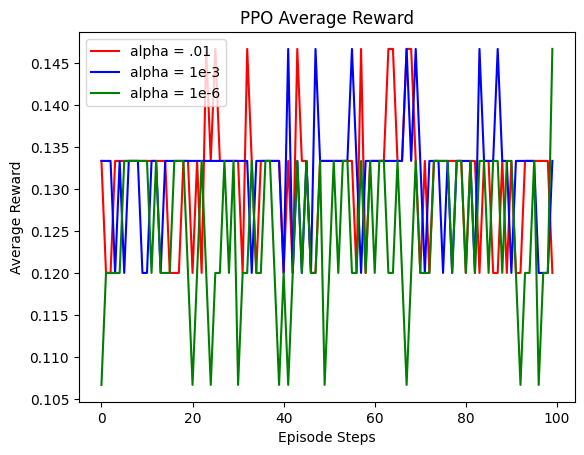

In [10]:
plt.title("PPO Average Reward")
plt.plot(first_success_rate, color = "red", label = "alpha = .01")
plt.plot(second_success_rate, color = "blue", label = "alpha = 1e-3")
plt.plot(third_success_rate, color = "green", label = "alpha = 1e-6")
plt.legend()
plt.xlabel("Episode Steps")
plt.ylabel("Average Reward")
plt.show()

In [20]:
import gymnasium as gym
from gymnasium.wrappers import TimeLimit
import mani_skill.envs
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env
from mani_skill.utils import gym_utils
from mani_skill.utils.wrappers.record import RecordEpisode
from mani_skill.vector.wrappers.sb3 import ManiSkillSB3VectorEnv
import torch
import numpy as np

SEED = 17
NUM_ENVS = 8
total_timesteps = 100000
def run_a2c(env, total_timesteps, policy="MlpPolicy", learning_rate=3e-4, model_name=""):
    env = gym.make("CartPole-v1", render_mode = "rgb_array")
    states, _ = env.reset(seed = SEED, options = {"low": -0.1, "high": 0.1})
    check_env(env, warn = True)

    a2c_model = A2C("MlpPolicy", env=env, learning_rate=learning_rate, verbose=1)
    a2c_model.learn(total_timesteps=100000, progress_bar=True)
    a2c_model.save(model_name)
    print(f"Saved model: {model_name}")

In [21]:
run_a2c(env, total_timesteps, learning_rate=0.01, model_name="a2c_0.01")
run_a2c(env, total_timesteps, learning_rate=1e-3, model_name="a2c_1e-3")
run_a2c(env, total_timesteps, learning_rate=1e-6, model_name="a2c_1e-6")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 9.75      |
|    ep_rew_mean        | 9.75      |
| time/                 |           |
|    fps                | 783       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -5.97e-05 |
|    explained_variance | 0.998     |
|    learning_rate      | 0.01      |
|    n_updates          | 99        |
|    policy_loss        | 1.01e-06  |
|    value_loss         | 0.0562    |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 9.19      |
|    ep_rew_mean        | 9.19      |
| time/                 |           |
|    fps                | 782       |
|    iterations         | 200   

Saved model: a2c_0.01
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 29.1     |
|    ep_rew_mean        | 29.1     |
| time/                 |          |
|    fps                | 896      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.637   |
|    explained_variance | -0.125   |
|    learning_rate      | 0.001    |
|    n_updates          | 99       |
|    policy_loss        | -6.29    |
|    value_loss         | 127      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 27.9     |
|    ep_rew_mean        | 27.9     |
| time/                 |          |
|    fps                | 927      |
|    iterations         | 200    

Saved model: a2c_1e-3
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 20       |
|    ep_rew_mean        | 20       |
| time/                 |          |
|    fps                | 950      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | -0.00687 |
|    learning_rate      | 1e-06    |
|    n_updates          | 99       |
|    policy_loss        | 2.04     |
|    value_loss         | 10.6     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 22       |
|    ep_rew_mean        | 22       |
| time/                 |          |
|    fps                | 951      |
|    iterations         | 200    

Saved model: a2c_1e-6


In [33]:
def get_average(model_name, iterations=100):
    max_episode_steps = 75
    model = A2C.load(model_name)
    eval_env = gym.make("CartPole-v1", render_mode = "rgb_array")
    obs, _ = eval_env.reset()
    success = []
    success_rate_list = []
    iterations = 100
    for iter in range(iterations):
        for i in range(max_episode_steps):
            action, _states = model.predict(obs, deterministic=True)
            # obs, rewards, dones, _, info = eval_env.step(action)
            output = eval_env.step(action)
            reward = output[1]
            
            #print(f"output {i}: {output}")
            #print(f"Reward {i}: {reward}\n")

            success.append(reward)
        success_rate = np.mean(np.array(success))
        #print(f"Success Rate: {success_rate}")
        success_rate_list.append(success_rate)
    return success_rate_list

0.006916503356852827
0.00760815369253811
0.006224853021167545


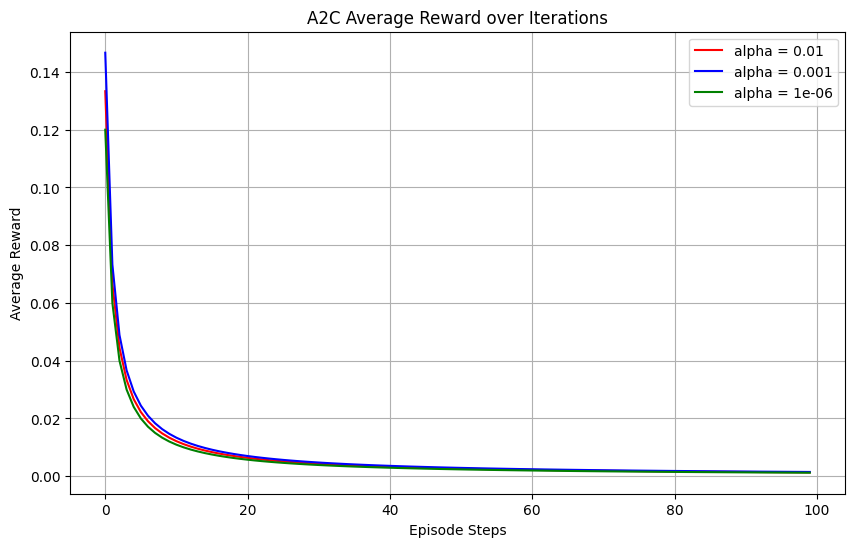

In [34]:
learning_rates = [0.01, 1e-3, 1e-6]
model_names = ["a2c_0.01", "a2c_1e-3", "a2c_1e-6"]
colors = ["red", "blue", "green"]

plt.figure(figsize=(10, 6))

for lr, model_name, color in zip(learning_rates, model_names, colors):
    success_rate_list = get_average(model_name)
    print(np.mean(success_rate_list))
    plt.plot(success_rate_list, label=f'alpha = {lr}', color=color)

plt.title("A2C Average Reward over Iterations")
plt.xlabel("Episode Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()